# **Klasifikasi Karakter Tulisan Tangan menggunakan HOG Feature Extraction dengan klasifier Support Vector Machine (SVM)**

**Nama :** Muhammad Hafidz Desprana Sitepu  
**NIM :** 4212301025  
**Kelas :** 5 Mekatronika A Pagi

## **Load Dataset**

In [1]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.preprocessing import LabelBinarizer

In [2]:
# Load dataset train
train_data = pd.read_csv('datasets/emnist-datasets/emnist-letters-train.csv', header=None)

In [3]:
# Separate features
train_images = train_data.iloc[:, 1:].values
train_labels = train_data.iloc[:, 0].values

In [4]:
train_images.shape

(88800, 784)

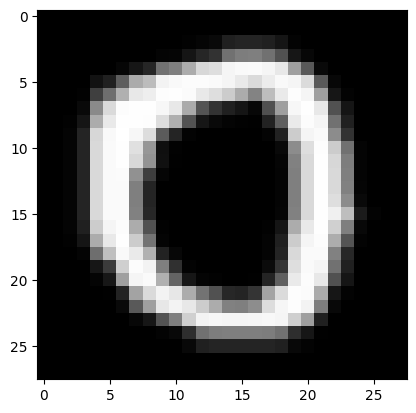

In [5]:
# Random data test
plt.imshow(train_images[3].reshape(28,28), cmap='gray')

In [6]:
# Checking data label
chr(train_labels[3] + 96)


'o'

In [7]:
# Testing HOG Feature
feature, _ = hog(train_images[3].reshape(28,28),
                 orientations=9,
                 pixels_per_cell = (8, 8),
                 cells_per_block=(2,2),
                 visualize=True,
                 block_norm='L2')

In [8]:
feature.shape

(144,)

In [9]:
# Temporary dataFrame for sampling
df = pd.DataFrame(train_images)
df['label'] = train_labels

In [10]:
# Sampling for 500 per class
sampled_df = df.groupby('label').sample(n=500, random_state=42)


In [11]:
# Separate features
train_images_sampled = sampled_df.drop('label', axis=1).values
train_labels_sampled = sampled_df['label'].values

In [12]:
unique, counts = np.unique(train_labels_sampled, return_counts=True)
dict(zip(unique, counts))


{np.int64(1): np.int64(500),
 np.int64(2): np.int64(500),
 np.int64(3): np.int64(500),
 np.int64(4): np.int64(500),
 np.int64(5): np.int64(500),
 np.int64(6): np.int64(500),
 np.int64(7): np.int64(500),
 np.int64(8): np.int64(500),
 np.int64(9): np.int64(500),
 np.int64(10): np.int64(500),
 np.int64(11): np.int64(500),
 np.int64(12): np.int64(500),
 np.int64(13): np.int64(500),
 np.int64(14): np.int64(500),
 np.int64(15): np.int64(500),
 np.int64(16): np.int64(500),
 np.int64(17): np.int64(500),
 np.int64(18): np.int64(500),
 np.int64(19): np.int64(500),
 np.int64(20): np.int64(500),
 np.int64(21): np.int64(500),
 np.int64(22): np.int64(500),
 np.int64(23): np.int64(500),
 np.int64(24): np.int64(500),
 np.int64(25): np.int64(500),
 np.int64(26): np.int64(500)}

## **Preprocessing with HOG Feature Extraction**

In [13]:
# Load another library
from sklearn import datasets

In [14]:
# Temporary variables
n_dim = feature.shape[0]
n_sample = train_images_sampled.shape[0]

In [15]:
# Creating variable for new dataset
X_train, y_train = datasets.make_classification(n_samples=n_sample, n_features=n_dim)

In [16]:
# Get HOG Feature from each images
# and put it to the new dataset variable
for i in range (n_sample):
  X_train[i], _ = hog(train_images_sampled[i].reshape(28,28),
                 orientations=9,
                 pixels_per_cell = (8, 8),
                 cells_per_block=(2,2),
                 visualize=True,
                 block_norm='L2')
  y_train[i] = train_labels_sampled[i]


In [18]:
# Saving HOG Feature Extraction
np.save("datasets/hog-datasets/hog-features.npy", X_train)
np.save("datasets/hog-datasets/hog-labels.npy", y_train)

In [19]:
# Convert categorical label to one hot label
lb = LabelBinarizer()
y_train_one_hot = lb.fit_transform(y_train)

In [20]:
y_train_one_hot[1000]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [21]:
lb.inverse_transform(np.array([y_train_one_hot[1000]]))

array([3])

## **Classification with SVM**

In [22]:
# Load another library
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

In [27]:
# SVM Classifier with linear kernel
svm_model = SVC(kernel='rbf', C=10, random_state=42)

In [28]:
# LOOCV Evaluation
loo = LeaveOneOut()
y_true = []
y_pred = []

In [29]:
# Loop LOOCV
for train_index, test_index in loo.split(X_train):
    # Split data
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Train SVM
    svm_model.fit(X_train_fold, y_train_fold)

    # Predict
    y_pred_fold = svm_model.predict(X_test_fold)

    # Store results
    y_true.append(y_test_fold[0])
    y_pred.append(y_pred_fold[0])

In [30]:
# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

## **Evaluation Metrics**

In [37]:
# Load another library
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [38]:
# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
conf_matrix = confusion_matrix(y_true, y_pred)

In [40]:
# Display results
print("\n=== EVALUATION RESULTS ===")
print(f"Accuracy: {accuracy*100:.2f}")
print(f"Precision: {precision*100:.2f}")
print(f"Recall: {recall*100:.2f}")
print(f"F1-Score: {f1*100:.2f}")
print(f"\nConfusion Matrix:\n{conf_matrix}")


=== EVALUATION RESULTS ===
Accuracy: 87.12
Precision: 87.19
Recall: 87.12
F1-Score: 87.13

Confusion Matrix:
[[401   3   6   5   5   0   6   7   0   1   0   0   4  10   9   0  26   5
    1   3   1   0   1   1   0   5]
 [  5 426   1   3   6   0   6  26   0   1   0   2   0   0   4   4   5   5
    0   1   0   0   0   1   0   4]
 [  0   0 461   0  20   1   4   0   2   0   0   3   0   0   4   1   2   0
    1   0   0   1   0   0   0   0]
 [  8   5   0 441   1   0   0   4   1  11   0   0   0   4  19   1   1   0
    0   0   0   2   0   0   0   2]
 [  3   6  24   0 442  10   3   0   0   2   0   3   0   0   1   0   1   1
    2   0   0   0   1   1   0   0]
 [  0   0   5   1   5 451   1   0   2   0   1   3   0   0   0   7   1   0
    6  15   0   0   0   1   0   1]
 [ 18  10   9   2   6   5 351   0   1   2   0   0   0   3   2   0  80   0
    8   0   0   0   0   0   2   1]
 [  3  24   0   1   1   0   0 444   1   0   2   5   3   9   0   0   0   1
    0   1   2   0   1   0   2   0]
 [  0   0   1   6 